<a href="https://colab.research.google.com/github/Diogoa83/Algoritmo-Naive-Bayes/blob/main/Machine_learn_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

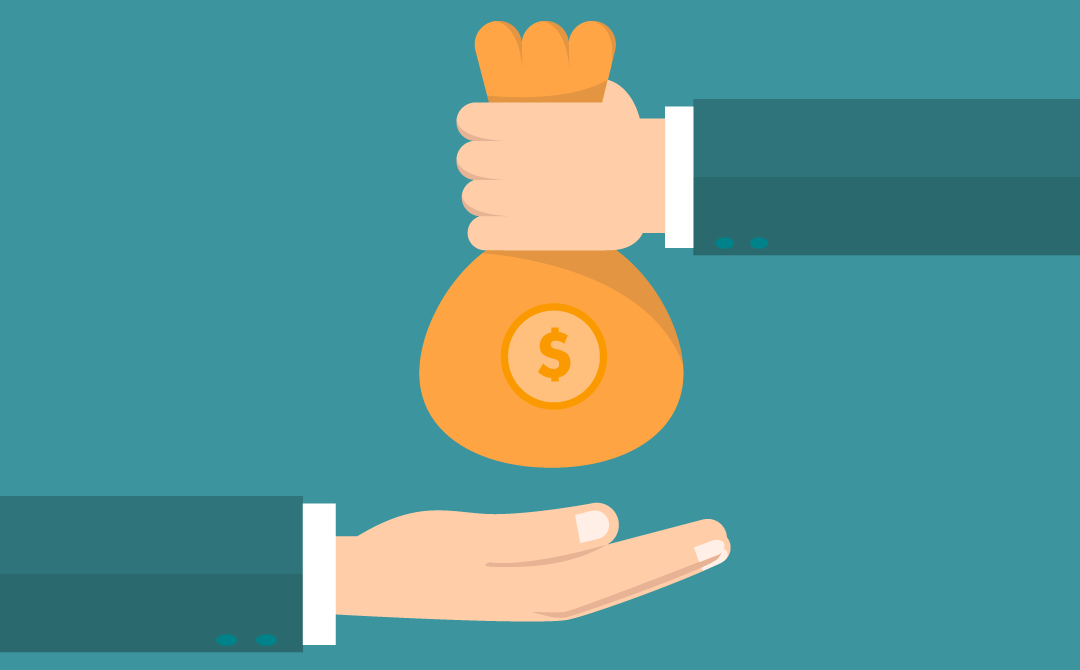

# Nesta base dados buscaremos analisar o perfil dos clientes e identificar possiveis inadimplencias para o futuro, onde o algoritmo analisara a Renda, Divida, idade e projetar se o cliente sera inadimplente ou adimplente.

# Default:
# 0 - não Pagaram sua divida
# 1 - Pagaram sua divida

In [ ]:
!pip install plotly --upgrade 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [ ]:
# LENDO ARQUIVO
base_credit = pd.read_csv('credit_data.csv')
base_credit

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [ ]:
base_credit.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [ ]:
# prevendo o maior valor de renda anual da tabela
base_credit[base_credit['income']>=69995.685578]

,clientid,income,age,loan,default
422,423,69995.685578,52.719673,2084.370861,0


In [ ]:
# prevendo o menor valor de divida anual da tabela
base_credit[base_credit['loan']<=1.377630]

,clientid,income,age,loan,default
865,866,28072.604355,54.142548,1.37763,0


In [ ]:
# contagem de quantas unidades tem cada variavel na tabela default
# 0 = 1717 e 1 = 283
np.unique(base_credit['default'], return_counts=True)

(array([0, 1], dtype=int64), array([1717,  283], dtype=int64))

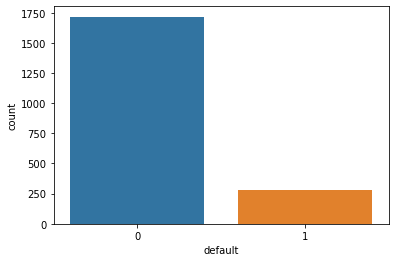

In [ ]:
sns.countplot(x=base_credit['default']);

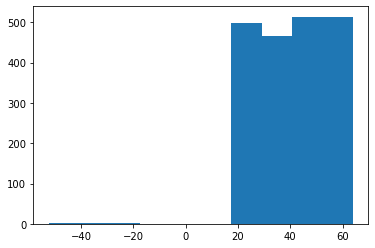

In [ ]:
plt.hist(x=base_credit['age']);

## tratamento dos valores inconsistentes

In [ ]:
# procurando clientes com idade menor que 0
base_credit.loc[base_credit['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [ ]:
#preencher os valores inconsistentes manualmente

# ou

# preencher os valores com a media

In [ ]:
base_credit.mean()

clientid     1000.500000
income      45331.600018
age            40.807559
loan         4444.369695
default         0.141500
dtype: float64

In [ ]:
# media de idade de toda tabela (NESTA MEDIA INCLUI OS OUTLIERS, IDADES NEGATIVAS)
base_credit['age'].mean()

40.80755937840458

In [ ]:
# media de idade sem contar com os numeros negativos (SEM IDADE NEGATIVAS)
base_credit['age'][base_credit['age'] > 0].mean()

40.92770044906149

In [ ]:
# ALTERANDO AS IDADES NEGATIVAS PELA MEDIA DE IDADES
base_credit.loc[base_credit['age'] < 0, 'age'] = 40.92

In [ ]:
# CONFERINDO SE FOI ALTERADO OS OUTLIERS PELA MEDIA
base_credit.loc[base_credit['age'] < 0]

,clientid,income,age,loan,default


In [ ]:
# conferindo se os valores incosistentes da idade foram atualizados pela media linha 15, 21, 26
# como iremos filtrar pela coluna (clienteid) buscaremos pelas linhas 16, 22, 27
base_credit.loc[base_credit['clientid'].isin([16, 22, 27])]

,clientid,income,age,loan,default
15,16,50501.726689,40.92,3977.287432,0
21,22,32197.620701,40.92,4244.057136,0
26,27,63287.038908,40.92,9595.286289,0


## TRATAMENTO DE VALORES FALTANTES

In [ ]:
# ALEM DAS IDADES NEGATIVAS TAMBEM TEMOS IDADES FALTANTES QUE IREMOS ALTERAR PARA MEDIA
base_credit.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [ ]:
# buscando idades com valores Nulos ou sem Numeração
# precisamos fazer o preenchimentos
base_credit.loc[pd.isnull(base_credit['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [ ]:
# preenchendo os valores nulos com a media
# fill = preencher
base_credit['age'].fillna(base_credit['age'].mean(), inplace=True)
# buscando se ainda existe valores nulos
base_credit.loc[pd.isnull(base_credit['age'])]

,clientid,income,age,loan,default


In [ ]:
# buscando pelo ID os valores Nulos
# esta busca é feita para verificar a alteração - valores nulos pela media 40.92
base_credit.loc[base_credit['clientid'].isin([29, 31, 32])]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


## Divisão entre previsores e classe


In [ ]:
X_credit = base_credit.iloc[:, 1:4].values
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [ ]:
y_credit = base_credit.iloc[:, 4].values
y_credit

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [ ]:
# biblioteca para diminuir as escalas
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
X_credit = scaler_credit.fit_transform(X_credit)

In [ ]:
X_credit[:,0].min(), X_credit[:,1].min(), X_credit[:,2].min()

(-1.7676158019964077, -1.7264145408889917, -1.4592791099462408)

In [ ]:
X_credit[:,0].max(), X_credit[:,1].max(), X_credit[:,2].max()

(1.7220222385319197, 1.7393673928651967, 3.0616609141708273)

## DIVIDINDO BASE DE TREINAMENTO E TESTE

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# dividindo os dados em 80% para treinamento e 20% para teste
X_credit_treinamento, X_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split\
    (X_credit, y_credit, test_size= 0.20, random_state = 0) 

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1600, 3), (1600,))

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

((400, 3), (400,))

## NAIVE BAYES RISCO DE CREDITO

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
# IMPORTANDO A BIBLIOTECA GAUSSIAN
from sklearn.naive_bayes import GaussianNB

In [ ]:
naive_credit_data = GaussianNB()
naive_credit_data.fit(X_credit_treinamento, y_credit_treinamento)

GaussianNB()

In [ ]:
previsões = naive_credit_data.predict(X_credit_teste)

In [ ]:
# PREVISAO GERADA PELO ALGORITIMO
previsões

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
# NOSSA TABELA DE DADOS REAL, QUE IREMOS CONFIRIR COM AS PREVIÇÕES ACIMA
# IREMOS CONFERIR A RESPOSTA REAL COM AS PREVIÇÕES A CIMA
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
# importando a biblioteca para saber o nivel de acertividade
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# nivel de acertividade do algoritimo 
# 94,75% de acertividade
accuracy_score(y_credit_teste, previsões)

0.9475

In [ ]:
confusion_matrix(y_credit_teste, previsões)

array([[342,   6],
       [ 15,  37]], dtype=int64)

In [ ]:

print(classification_report(y_credit_teste, previsões))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       348
           1       0.86      0.71      0.78        52

    accuracy                           0.95       400
   macro avg       0.91      0.85      0.87       400
weighted avg       0.95      0.95      0.95       400



## NAIVE BAYES RISCO DE CREDITO CATEGORICO

In [ ]:
# IMPORTANDO A BIBLIOTECA GAUSSIAN
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# BASE DE DADOS DE RISCO DE CREDITO
base_risco_credito = pd.read_csv('risco_credito.csv')
base_risco_credito

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [ ]:
len(base_risco_credito)

14

In [ ]:
# CRIANDO A VARIAVEL X COM OS DADOS CATEGORICOS
# DIVIDINDO AS COLUNAS
# UTILIZANDO AS COLUNAS 0,1,2,3
X_risco_credito = base_risco_credito.iloc[:, 0:4].values
X_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [ ]:
# CRIANDO MINHAs VARIAVEIS Y COM A CATEGORIA RISCO
# UTILIZANDO APENAS A COLUNA 4
y_risco_credito = base_risco_credito.iloc[:, 4].values
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [ ]:
X_risco_credito[:, 0] = label_encoder_historia.fit_transform(X_risco_credito[:, 0])
X_risco_credito[:, 1] = label_encoder_divida.fit_transform(X_risco_credito[:, 1])
X_risco_credito[:, 2] = label_encoder_garantia.fit_transform(X_risco_credito[:, 2])
X_risco_credito[:, 3] = label_encoder_renda.fit_transform(X_risco_credito[:, 3])

In [ ]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [ ]:
# CRIANDO ALGORITIMO NAYVE BAYES PARA TREINAMENTO
# FIT = ENCAIXADO
# ESSE CODIGO GERARA A TABELA DE PROBABILIDADE
naive_risco_credito = GaussianNB()
naive_risco_credito.fit(X_risco_credito, y_risco_credito)

GaussianNB()

In [ ]:
# TREINAMENTO MANUAL

# historia boa(0), divida alta(0), garantia nenhuma(1), renda > 35 (2)
# historia ruim(2), divida alta(0), garantias adequada (0), renda < 15 (0)
# historia desconhecida (1), divida alta(0), garantias nenhuma (1), renda entre 15 a 35 (1)
# historia ruim(2), divida baixa(1), garantias adequada (0), renda > 35 (2)

In [ ]:
previsao1 = naive_risco_credito.predict([[0,0,1,2]])
previsao1

array(['baixo'], dtype='<U8')

In [ ]:
previsao2 = naive_risco_credito.predict([[2,0,0,0]])
previsao2

array(['moderado'], dtype='<U8')

In [ ]:
previsao3 = naive_risco_credito.predict([[1,0,1,1]])
previsao3

array(['alto'], dtype='<U8')

In [ ]:
previsao4 = naive_risco_credito.predict([[2,1,0,2]])
previsao4

array(['baixo'], dtype='<U8')

In [ ]:
previsao5 = naive_risco_credito.predict([[0,1,0,0]])
previsao5

array(['moderado'], dtype='<U8')